In [43]:
import numpy as np
txt=['파이썬 차트 파이썬 머신러닝',
      '차트 파이썬 R 차트',
       'R 분석 시각화'
      ]

In [44]:
# 빈칸 단위로 나누기
txtList=[i.split(' ') for i in txt]
txtList

[['파이썬', '차트', '파이썬', '머신러닝'], ['차트', '파이썬', 'R', '차트'], ['R', '분석', '시각화']]

In [45]:
nouns=sorted(list(set([j for i in txtList for j in i])))

In [46]:
nouns

['R', '머신러닝', '분석', '시각화', '차트', '파이썬']

In [47]:
import pandas as pd
tdm=[]
for i in txtList:
    tdm.append([])
    for j in nouns:
        tdm[-1].append(i.count(j))
tf_=pd.DataFrame(tdm, columns=nouns)

In [48]:
tf_

,R,머신러닝,분석,시각화,차트,파이썬
0,0,1,0,0,1,2
1,1,0,0,0,2,1
2,1,0,1,1,0,0


In [49]:
import numpy as np
D=len(tf_)
df=tf_.astype(bool).sum()
df

R       2
머신러닝    1
분석      1
시각화     1
차트      2
파이썬     2
dtype: int64

In [50]:
idf=D/df
idf

R       1.5
머신러닝    3.0
분석      3.0
시각화     3.0
차트      1.5
파이썬     1.5
dtype: float64

In [51]:
tfidf= tf_*idf
tfidf

,R,머신러닝,분석,시각화,차트,파이썬
0,0.0,3.0,0.0,0.0,1.5,3.0
1,1.5,0.0,0.0,0.0,3.0,1.5
2,1.5,0.0,3.0,3.0,0.0,0.0


In [52]:
txt

['파이썬 차트 파이썬 머신러닝', '차트 파이썬 R 차트', 'R 분석 시각화']

In [53]:
# tf 구하는 모듈        
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tdm=cv.fit_transform(txt)
tdm.toarray()

array([[1, 0, 0, 1, 2],
       [0, 0, 0, 2, 1],
       [0, 1, 1, 0, 0]], dtype=int64)

In [55]:
feature = cv.get_feature_names_out()
feature

array(['머신러닝', '분석', '시각화', '차트', '파이썬'], dtype=object)

In [42]:
s_tf = pd.DataFrame(tdm.toarray(),columns=feature)
s_tf

,머신러닝,분석,시각화,차트,파이썬
0,1,0,0,1,2
1,0,0,0,2,1
2,0,1,1,0,0


In [5]:
from operator import index
import pandas as pd
from konlpy.tag import Okt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

df=pd.read_csv('./data/전처리_샘플뉴스.csv')
df1=[df.text[i] for i in df.index]
df1

# 2. 명사 추출
okt=Okt()
nouns=[okt.nouns(i) for i in df1]

# 3. stopword
stopword=['서울','밤','사회']
last_nouns=[]
for noun in nouns:
    last_nouns.append([w for w in noun if w not in stopword])

# 4. 빈 리스트 삭제
last_nouns=[i for i in last_nouns if len(i)!=0]

# 5. 전처리 완료: 
txt=[' '.join(i) for i in last_nouns]
txt


['수도권 대상 거리 두기 단계 시행 음식점 등 오후 대거 문 때문 단계 시행 첫날 날 중심 가의 식당 술집 등 매장 내 취식 금지 시작 시각 오후 전후 장사 한식 집 등 식사 위주 식당 해 지면 찌 감치 마감 고깃집 횟집 이자카야 맥줏집 등 데드라인 이 임박 손님 매장 정리 시작 평소 라면 간판 불빛 불야성 번화가 골목 깜깜 정도 종각역 인근 맥줏집 사장 김모 씨 오후 손님 오후 마감 달라 고 부탁 이 가게 평소 영업 시간 오후 다음 날 오전 김씨 원래 가장 시간 문 코로나 때문 매출 액 예년 로 젠 그 반토막 안 것 고 한숨 오후 식당 최모 씨 친구 약속 때문 강제 이 시간 귀가 고 말 층 규모 대형 술집 단계 시행 다음 달 아예 문 이 술집 사장 오후 영업 건 그냥 술집 문 이야기 라며 포장 배달 누가 술집 술 안주 배달 말 서울역 대합실 내 한식당 등 오후 이전 문 패스트푸드 가게 일부 포장 주문 손님 눈 뿐 중구 국집 사장 홍 정복 씨 원래 오후 오전 사이 매출 전체 를 차지 며 매출 액 동참 최대한 코로나 고 말 업종 별로 희비 갈리 기도 온종일 포장 배달 판매 프랜차이즈 커피전문점 모습 결혼식 온라인 생중계 축하 댓글 축의금 계좌 이체 오후 정자동 카페 거리 로 경기도 성남시 분당구 정자동 카페 밀집 지역 스타벅스 고객 고객 발길 일쑤 매장 직원 포장 판매 설명 발길 고객 명 이상 화 고객 며 한숨 곳 불과 파리 바게뜨 별천지 인석 테이블 개 중 개 손님 이 가족 지인 커피 빵 노트북 컴퓨터 이용 개인 업무 이도 제과점 음식점 마찬가지 오전 오후 현장 취식 때문 또 다른 무풍지대 인 비 프랜차이즈 소규모 개인 카페 고객 북적 소셜네트워크서비스 인기 끌 경기도 광주시 카페 낮 수용 수 층 주차장 차 상태 프랜차이즈 커피전문점 중 차 안 음료 드라이브 스루 방식 매장 현장 취식 금지 대상 고객 발길 낮 경기도 남양주시 스타벅스 드라이브 스루 점포 차로 차량 대가 줄줄이 송파 나루 역 인근 매장 고객 차량 나 줄 바람 교통체증 빚 프렌 차 이즈 커피전문

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()
tdm=cv.fit_transform(txt)

#단어 목록 확인
feature=cv.get_feature_names_out()
#tf Matrix확인
print(tdm.toarray())
# tf
tf_=pd.DataFrame(tdm.toarray(), columns=feature)
tf_

[[0 2 0 ... 0 0 1]
 [0 1 0 ... 1 1 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]]


,가건물,가게,가계,가공,가구,가까이,가동,가량,가빈,가운데,...,회사,회의,횟집,효과,후퇴,휴가,휴직,흑자,희망고문,희비
0,0,2,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,1,0,1,0,1,1,2,0,0,...,2,0,0,1,1,1,1,1,1,0
2,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer()
tfidf_matrix=tfidf_vectorizer.fit_transform(txt)
# 단어 집합 
tfidf_feature=tfidf_vectorizer.get_feature_names_out()

#TF_IDF
tfidf_=pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_feature)
tfidf_

,가건물,가게,가계,가공,가구,가까이,가동,가량,가빈,가운데,...,회사,회의,횟집,효과,후퇴,휴가,휴직,흑자,희망고문,희비
0,0.000000,0.056080,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.034755,0.000000,...,0.00000,0.000000,0.034755,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034755
1,0.000000,0.020529,0.00000,0.025445,0.000000,0.020529,0.025445,0.05089,0.000000,0.000000,...,0.05089,0.000000,0.000000,0.025445,0.025445,0.025445,0.025445,0.025445,0.025445,0.000000
2,0.056003,0.000000,0.00000,0.000000,0.056003,0.000000,0.000000,0.00000,0.000000,0.056003,...,0.00000,0.056003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.14401,0.000000,0.000000,0.029047,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [12]:
# import pandas as pd
# tfidf_.corr()
import numpy as np
import pandas as pd

word_corr=np.corrcoef(tf_,rowvar=False)
print(word_corr)

print('='*100)
vocab=tf_.columns
df=pd.DataFrame(word_corr,columns=vocab)
df.index=vocab
df

[[ 1.    -0.375 -0.25  ... -0.25  -0.25  -0.25 ]
 [-0.375  1.    -0.375 ...  0.25   0.25   0.875]
 [-0.25  -0.375  1.    ... -0.25  -0.25  -0.25 ]
 ...
 [-0.25   0.25  -0.25  ...  1.     1.    -0.25 ]
 [-0.25   0.25  -0.25  ...  1.     1.    -0.25 ]
 [-0.25   0.875 -0.25  ... -0.25  -0.25   1.   ]]


,가건물,가게,가계,가공,가구,가까이,가동,가량,가빈,가운데,...,회사,회의,횟집,효과,후퇴,휴가,휴직,흑자,희망고문,희비
가건물,1.000,-0.375,-0.250,-0.25,1.000,-0.408248,-0.25,-0.25,-0.250,1.000,...,-0.25,1.000,-0.250,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.250
가게,-0.375,1.000,-0.375,0.25,-0.375,-0.102062,0.25,0.25,0.875,-0.375,...,0.25,-0.375,0.875,0.25,0.25,0.25,0.25,0.25,0.25,0.875
가계,-0.250,-0.375,1.000,-0.25,-0.250,0.612372,-0.25,-0.25,-0.250,-0.250,...,-0.25,-0.250,-0.250,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.250
가공,-0.250,0.250,-0.250,1.00,-0.250,0.612372,1.00,1.00,-0.250,-0.250,...,1.00,-0.250,-0.250,1.00,1.00,1.00,1.00,1.00,1.00,-0.250
가구,1.000,-0.375,-0.250,-0.25,1.000,-0.408248,-0.25,-0.25,-0.250,1.000,...,-0.25,1.000,-0.250,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,-0.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
휴가,-0.250,0.250,-0.250,1.00,-0.250,0.612372,1.00,1.00,-0.250,-0.250,...,1.00,-0.250,-0.250,1.00,1.00,1.00,1.00,1.00,1.00,-0.250
휴직,-0.250,0.250,-0.250,1.00,-0.250,0.612372,1.00,1.00,-0.250,-0.250,...,1.00,-0.250,-0.250,1.00,1.00,1.00,1.00,1.00,1.00,-0.250
흑자,-0.250,0.250,-0.250,1.00,-0.250,0.612372,1.00,1.00,-0.250,-0.250,...,1.00,-0.250,-0.250,1.00,1.00,1.00,1.00,1.00,1.00,-0.250
희망고문,-0.250,0.250,-0.250,1.00,-0.250,0.612372,1.00,1.00,-0.250,-0.250,...,1.00,-0.250,-0.250,1.00,1.00,1.00,1.00,1.00,1.00,-0.250


In [14]:
words=tfidf_.columns
edges = []

for i in range(len(words)):
    for j in range(i+1, len(words)):
        edges.append((words[i],words[j], word_corr[i,j]))
edges

[('가건물', '가게', -0.375),
 ('가건물', '가계', -0.24999999999999997),
 ('가건물', '가공', -0.24999999999999997),
 ('가건물', '가구', 1.0),
 ('가건물', '가까이', -0.408248290463863),
 ('가건물', '가동', -0.24999999999999997),
 ('가건물', '가량', -0.24999999999999997),
 ('가건물', '가빈', -0.24999999999999994),
 ('가건물', '가운데', 1.0),
 ('가건물', '가의', -0.24999999999999994),
 ('가건물', '가장', -0.408248290463863),
 ('가건물', '가족', 0.6123724356957945),
 ('가건물', '가중', -0.24999999999999997),
 ('가건물', '가평', 1.0),
 ('가건물', '가평군', 1.0),
 ('가건물', '가평읍', 1.0),
 ('가건물', '각별', 1.0),
 ('가건물', '각종', -0.24999999999999997),
 ('가건물', '간판', -0.24999999999999994),
 ('가건물', '갈등', -0.24999999999999997),
 ('가건물', '갈리', -0.24999999999999994),
 ('가건물', '감당', 1.0),
 ('가건물', '감소', -0.25),
 ('가건물', '감염증', -0.24999999999999997),
 ('가건물', '감치', -0.24999999999999994),
 ('가건물', '강물', -0.24999999999999997),
 ('가건물', '강수', -0.24999999999999997),
 ('가건물', '강수량', 0.6123724356957945),
 ('가건물', '강원', 0.9432422182837987),
 ('가건물', '강원영동', 1.0),
 ('가건물', '강제', -0.249999999

In [15]:
edges = sorted(edges, key=lambda x:x[2],reverse=True)
edges 

[('가건물', '가구', 1.0),
 ('가건물', '가운데', 1.0),
 ('가건물', '가평', 1.0),
 ('가건물', '가평군', 1.0),
 ('가건물', '가평읍', 1.0),
 ('가건물', '각별', 1.0),
 ('가건물', '감당', 1.0),
 ('가건물', '강원영동', 1.0),
 ('가건물', '강타', 1.0),
 ('가건물', '건물', 1.0),
 ('가건물', '게릴라', 1.0),
 ('가건물', '격상', 1.0),
 ('가건물', '경북', 1.0),
 ('가건물', '계속', 1.0),
 ('가건물', '곳곳', 1.0),
 ('가건물', '관광', 1.0),
 ('가건물', '교량', 1.0),
 ('가건물', '구조해', 1.0),
 ('가건물', '기해', 1.0),
 ('가건물', '끝내', 1.0),
 ('가건물', '남양주', 1.0),
 ('가건물', '남혜정', 1.0),
 ('가건물', '농경', 1.0),
 ('가건물', '농민', 1.0),
 ('가건물', '뉴스', 1.0),
 ('가건물', '뉴시스', 1.0),
 ('가건물', '당국', 1.0),
 ('가건물', '당부', 1.0),
 ('가건물', '대처', 1.0),
 ('가건물', '대청댐', 1.0),
 ('가건물', '대피', 1.0),
 ('가건물', '도로', 1.0),
 ('가건물', '독자', 1.0),
 ('가건물', '동원', 1.0),
 ('가건물', '동이', 1.0),
 ('가건물', '뒤편', 1.0),
 ('가건물', '만인', 1.0),
 ('가건물', '매몰', 1.0),
 ('가건물', '명의', 1.0),
 ('가건물', '무동', 1.0),
 ('가건물', '박현준', 1.0),
 ('가건물', '반도체', 1.0),
 ('가건물', '방류', 1.0),
 ('가건물', '벌이', 1.0),
 ('가건물', '범람', 1.0),
 ('가건물', '베트남인', 1.0),
 ('가건물', '병원', 1.0)

In [16]:
weight_list=[x[2] for x in edges]   
# weight_list = [weight for _, _, weight in edges] 도 사용가능
weight_list

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [17]:
edge_list = [(word1,word2) for word1, word2, weight in edges]
edge_list

[('가건물', '가구'),
 ('가건물', '가운데'),
 ('가건물', '가평'),
 ('가건물', '가평군'),
 ('가건물', '가평읍'),
 ('가건물', '각별'),
 ('가건물', '감당'),
 ('가건물', '강원영동'),
 ('가건물', '강타'),
 ('가건물', '건물'),
 ('가건물', '게릴라'),
 ('가건물', '격상'),
 ('가건물', '경북'),
 ('가건물', '계속'),
 ('가건물', '곳곳'),
 ('가건물', '관광'),
 ('가건물', '교량'),
 ('가건물', '구조해'),
 ('가건물', '기해'),
 ('가건물', '끝내'),
 ('가건물', '남양주'),
 ('가건물', '남혜정'),
 ('가건물', '농경'),
 ('가건물', '농민'),
 ('가건물', '뉴스'),
 ('가건물', '뉴시스'),
 ('가건물', '당국'),
 ('가건물', '당부'),
 ('가건물', '대처'),
 ('가건물', '대청댐'),
 ('가건물', '대피'),
 ('가건물', '도로'),
 ('가건물', '독자'),
 ('가건물', '동원'),
 ('가건물', '동이'),
 ('가건물', '뒤편'),
 ('가건물', '만인'),
 ('가건물', '매몰'),
 ('가건물', '명의'),
 ('가건물', '무동'),
 ('가건물', '박현준'),
 ('가건물', '반도체'),
 ('가건물', '방류'),
 ('가건물', '벌이'),
 ('가건물', '범람'),
 ('가건물', '베트남인'),
 ('가건물', '병원'),
 ('가건물', '보가'),
 ('가건물', '비닐하우스'),
 ('가건물', '사거리'),
 ('가건물', '사리'),
 ('가건물', '사망자'),
 ('가건물', '서해'),
 ('가건물', '세상'),
 ('가건물', '소방'),
 ('가건물', '손자'),
 ('가건물', '송민섭'),
 ('가건물', '수습'),
 ('가건물', '수해'),
 ('가건물', '시신'),
 ('가건물', '신고'),
 ('

In [18]:
import networkx as nx

G = nx.Graph()
rank=10

edge_set = set()  
for word1, word2, weight in edges[:rank]:   # 상관도가 높은 값에서 10개까지. 여기서는 15개만 있음으로 모두 나옴.
    G.add_edge(word1, word2, weight=weight) # 단어1,2 자료와 거기에 해당되는 상관도값(weight)
    edge_set.add((word1,word2))
edge_set

{('가건물', '가구'),
 ('가건물', '가운데'),
 ('가건물', '가평'),
 ('가건물', '가평군'),
 ('가건물', '가평읍'),
 ('가건물', '각별'),
 ('가건물', '감당'),
 ('가건물', '강원영동'),
 ('가건물', '강타'),
 ('가건물', '건물')}

In [19]:
# https://networkx.org/documentation/stable/tutorial.html
# https://95pbj.tistory.com/34   (한국어 사이트)


print('\n ▶ 노드갯수 출력')   # feature 갯수 (R, 분석, 시각화, 머신러닝, 파이썬, 차트)
print(G.number_of_nodes())

print('\n ▶노드값 출력')
print(G.nodes)

print('\n ▶ 엣지(word1,word2)값 출력')
print(G.edges)


## 디그리는 노드에서 분기하는 선의 갯수로서
# 여기서는 모든 노드와 연결되어 있음.(상관도를 모두 구함으로)
# 그래서 분석일때는 5개의 노드(n-1)개의 디그리가 생김.  분석->시각화, 분석->머신러닝, 분석->파이썬, 분석->차트, 분석-R
print('\n ▶ 디그리값 출력')  
print(G.degree)


print('\n ▶ 인접')
print(G.adj)
      
print('\n ▶ edges의 갯수')
print(G.number_of_edges())


print('\n ▶ 요약 ')
print(nx.info(G))


 ▶ 노드갯수 출력
11

 ▶노드값 출력
['가건물', '가구', '가운데', '가평', '가평군', '가평읍', '각별', '감당', '강원영동', '강타', '건물']

 ▶ 엣지(word1,word2)값 출력
[('가건물', '가구'), ('가건물', '가운데'), ('가건물', '가평'), ('가건물', '가평군'), ('가건물', '가평읍'), ('가건물', '각별'), ('가건물', '감당'), ('가건물', '강원영동'), ('가건물', '강타'), ('가건물', '건물')]

 ▶ 디그리값 출력
[('가건물', 10), ('가구', 1), ('가운데', 1), ('가평', 1), ('가평군', 1), ('가평읍', 1), ('각별', 1), ('감당', 1), ('강원영동', 1), ('강타', 1), ('건물', 1)]

 ▶ 인접
{'가건물': {'가구': {'weight': 1.0}, '가운데': {'weight': 1.0}, '가평': {'weight': 1.0}, '가평군': {'weight': 1.0}, '가평읍': {'weight': 1.0}, '각별': {'weight': 1.0}, '감당': {'weight': 1.0}, '강원영동': {'weight': 1.0}, '강타': {'weight': 1.0}, '건물': {'weight': 1.0}}, '가구': {'가건물': {'weight': 1.0}}, '가운데': {'가건물': {'weight': 1.0}}, '가평': {'가건물': {'weight': 1.0}}, '가평군': {'가건물': {'weight': 1.0}}, '가평읍': {'가건물': {'weight': 1.0}}, '각별': {'가건물': {'weight': 1.0}}, '감당': {'가건물': {'weight': 1.0}}, '강원영동': {'가건물': {'weight': 1.0}}, '강타': {'가건물': {'weight': 1.0}}, '건물': {'가건물': {'weight': 1.0}}}

 ▶ 

C:\Users\user\AppData\Local\Temp\ipykernel_6516\3912046564.py:30: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [20]:
tmp=np.sum(tf_)
print(tmp)
print('='*100)
nsize=tmp
nsize=2000*(nsize-min(nsize))/(max(nsize)-min(nsize))

print(nsize)

가건물     1
가게      3
가계      4
가공      1
가구      1
       ..
휴가      1
휴직      1
흑자      1
희망고문    1
희비      1
Length: 852, dtype: int64
가건물       0.000000
가게      222.222222
가계      333.333333
가공        0.000000
가구        0.000000
           ...    
휴가        0.000000
휴직        0.000000
흑자        0.000000
희망고문      0.000000
희비        0.000000
Length: 852, dtype: float64


In [21]:
temp={k:nsize[k] for k in dict(G.degree)}
temp

{'가건물': 0.0,
 '가구': 0.0,
 '가운데': 0.0,
 '가평': 111.11111111111111,
 '가평군': 111.11111111111111,
 '가평읍': 111.11111111111111,
 '각별': 0.0,
 '감당': 0.0,
 '강원영동': 0.0,
 '강타': 0.0,
 '건물': 0.0}

[('가건물', '가구', 1.0), ('가건물', '가운데', 1.0), ('가건물', '가평', 1.0), ('가건물', '가평군', 1.0), ('가건물', '가평읍', 1.0), ('가건물', '각별', 1.0), ('가건물', '감당', 1.0), ('가건물', '강원영동', 1.0), ('가건물', '강타', 1.0), ('가건물', '건물', 1.0)]


ValueError: s must be a scalar, or float array-like with the same size as x and y

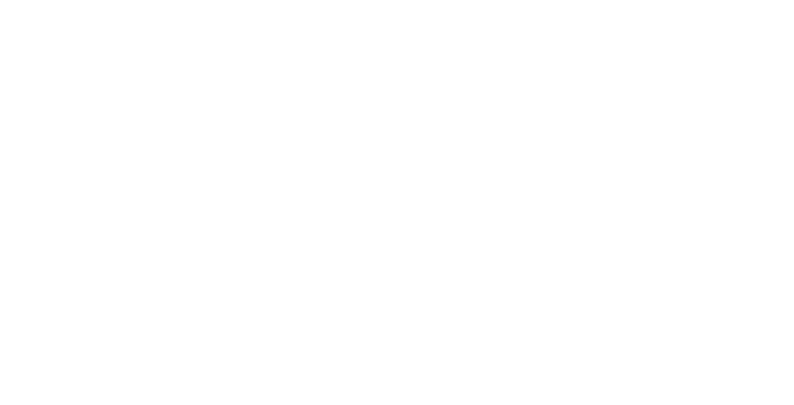

In [22]:
###############################
### 상관계수 시각화
## 그래프를  그리기 위해서 준비해야 하는건
## 몇개의 노드를 준비할지,
# 그 노드에서 몇개의 디그리가 나올지
# 그리고 엣지(노드와 노드의 쌍)별 거리는 무엇으로 할지.
##############################

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.figure(figsize=(10,5)); plt.axis('off')

fname = fm.FontProperties().get_name()

print(edges[:rank])
nx.draw_networkx(G, with_labels = True,
                 font_family=fname,width=weight_list[:rank],edge_color='lightblue',font_size=15,
                 node_size=nsize)   # 상관관계값이 높을수록 가깝게 표시됨